In [11]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [12]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [13]:
homogeneity_score([0, 0, 1, 1], [0, 0, 0, 1])

0.31127812445913283

In [14]:
ds = pd.read_csv('D:/data/csv/loancleansed.csv')
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y


In [15]:
y = ds['Loan_Status']
y = y.replace('Y', 1.0).replace('N', 0.0)
X = ds.drop(['Loan_Status', 'Dependents', 'Loan_ID', 'LoanAmount', 'Married', 'Gender', 'Education', 'Self_Employed', 'Property_Area'], axis=1)
X.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,5849,0.0,360,1
1,4583,1508.0,360,1
2,3000,0.0,360,1
3,2583,2358.0,360,1
4,6000,0.0,360,1


In [16]:
s_avg = silhouette_score(X,y)
round(s_avg,4)

0.04

In [17]:
s_values = silhouette_samples(X, y)
s_values

array([ 0.10086299, -0.14063494,  0.10469353,  0.1430388 ,  0.09904983,
        0.10067206,  0.13289971, -0.15077912,  0.14250569, -0.02337185,
        0.1259262 ,  0.13968053,  0.05265082, -0.12656573,  0.10234554,
        0.10445361,  0.10988741, -0.11538881, -0.11146218,  0.12141875,
       -0.09109003,  0.07689792, -0.14822813, -0.15290652, -0.14270268,
        0.06801816,  0.14539077,  0.13366435, -0.0912967 ,  0.14558669,
       -0.13148003, -0.11304714, -0.11213862,  0.14557886, -0.04780034,
        0.13815078, -0.1257646 ,  0.14335082,  0.06217573,  0.14555932,
       -0.11638184,  0.11630732,  0.0945968 ,  0.14218096,  0.10535484,
        0.10773929,  0.10233353,  0.10115082, -0.12977916,  0.14209375,
        0.12708935,  0.10566835, -0.11680143, -0.11248152, -0.05858533,
        0.13123624,  0.13082204, -0.15259284,  0.08118011,  0.1398228 ,
        0.11425294,  0.10504411, -0.12874573, -0.11123685, -0.11731678,
       -0.09863152, -0.15170143,  0.0567738 ,  0.08983413, -0.11

In [18]:
X.shape, s_values.shape

((614, 4), (614,))

In [23]:
s_values[cluster_labels == 0]

array([-0.14063494, -0.15077912, -0.02337185, -0.12656573, -0.11538881,
       -0.11146218, -0.09109003, -0.14822813, -0.15290652, -0.14270268,
       -0.0912967 , -0.13148003, -0.11304714, -0.11213862, -0.04780034,
       -0.1257646 , -0.11638184, -0.12977916, -0.11680143, -0.11248152,
       -0.05858533, -0.15259284, -0.12874573, -0.11123685, -0.11731678,
       -0.09863152, -0.15170143, -0.11626678, -0.11194037, -0.11736682,
       -0.10603537, -0.10638714, -0.12046755, -0.11928604, -0.11630499,
       -0.09918411, -0.09425525, -0.12895739, -0.11838025, -0.12374453,
       -0.05608332, -0.11329127, -0.06283948, -0.11270468, -0.04588566,
       -0.14568432, -0.13264987, -0.06839573, -0.1029068 , -0.07814484,
       -0.09950593, -0.08840639, -0.14417485, -0.11270468, -0.09900724,
       -0.11571411, -0.13284047, -0.03334104, -0.13779383, -0.06174247,
       -0.0933362 , -0.01673163, -0.09825348, -0.0563361 , -0.1053307 ,
       -0.15009197, -0.06182813, -0.11798278, -0.11452299, -0.07

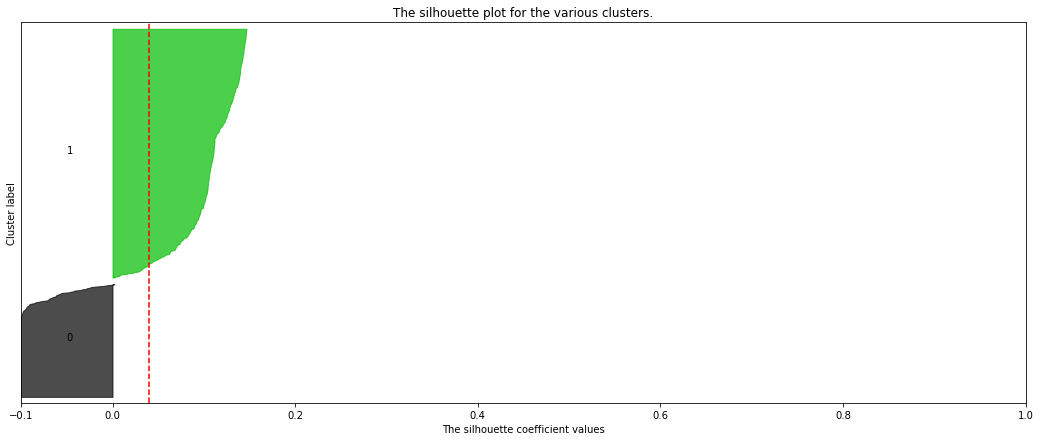

In [20]:
n_clusters = 2
cluster_labels = y

fig, (ax1) = plt.subplots(1)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

s_values = silhouette_samples(X, cluster_labels)

y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_values = s_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),  0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=s_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [27]:
cluster_labels

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [28]:
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y
